Jimkelly Percine

This data set is Fertility indicators, by age, annualy and 5-year periods, from 1950-1955 to 2095-2100.
ASFR: Age-specific fertility rate (births per 1,000 women)
PASFR: Percentage age-specific fertility rate
Births: Number of births, both sexes combined (thousands)

Two Questions that I will ask are: 
1. what is the total births based on age range and location?
2. what are the total births based on time period and location?

https://population.un.org/wpp/Download/Standard/CSV/: this is the URL of the CSV file for the Worlds fertility rates based on Location and time. I Downloaded it as a CSV File from the Website and in Jupyter notebook  I used pd.read_csv('WPP2019_Fertility_by_Age.csv') to download the data so that it is use full to all the functions. 

In [78]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [79]:
df = pd.read_csv('WPP2019_Fertility_by_Age.csv')
data = [row for row in df]
df.head(25)

,LocID,Location,VarID,Variant,Time,MidPeriod,AgeGrp,AgeGrpStart,AgeGrpSpan,ASFR,PASFR,Births
0,4,Afghanistan,2,Medium,1950-1955,1953,15-19,15,5,145.245,9.748,280.906
1,4,Afghanistan,2,Medium,1950-1955,1953,20-24,20,5,313.809,21.061,522.501
2,4,Afghanistan,2,Medium,1950-1955,1953,25-29,25,5,339.005,22.752,481.946
3,4,Afghanistan,2,Medium,1950-1955,1953,30-34,30,5,290.535,19.499,351.097
4,4,Afghanistan,2,Medium,1950-1955,1953,35-39,35,5,233.111,15.645,238.645
5,4,Afghanistan,2,Medium,1950-1955,1953,40-44,40,5,129.689,8.704,112.219
6,4,Afghanistan,2,Medium,1950-1955,1953,45-49,45,5,38.606,2.591,28.162
7,4,Afghanistan,2,Medium,1955-1960,1958,15-19,15,5,145.245,9.748,309.413
8,4,Afghanistan,2,Medium,1955-1960,1958,20-24,20,5,313.809,21.061,572.829
9,4,Afghanistan,2,Medium,1955-1960,1958,25-29,25,5,339.005,22.752,527.175


In [80]:
# df.describe is used to just give a breif overview of the data
df.describe()

,LocID,VarID,MidPeriod,AgeGrpStart,AgeGrpSpan,ASFR,PASFR,Births
count,458486.000000,458486.000000,458486.000000,458486.000000,458486.0,458486.000000,458486.000000,317926.000000
mean,700.222663,66.257962,2053.398256,30.000000,5.0,67.111552,14.285714,5705.545275
std,642.616697,91.888751,31.648254,10.000011,0.0,61.002188,11.218105,22751.018174
min,4.000000,2.000000,1953.000000,15.000000,5.0,0.000000,0.000000,0.000000
25%,296.000000,3.000000,2033.000000,20.000000,5.0,14.550000,3.708000,13.588250
50%,591.000000,7.000000,2058.000000,30.000000,5.0,55.300500,12.979000,150.990000
75%,905.000000,202.000000,2078.000000,40.000000,5.0,104.073000,23.579000,1402.741000
max,5501.000000,207.000000,2098.000000,45.000000,5.0,486.748000,60.870000,794378.321000


In [81]:
# this df.colums prints the array of columns and the index array
print(df.columns)

Index(['LocID', 'Location', 'VarID', 'Variant', 'Time', 'MidPeriod', 'AgeGrp',
       'AgeGrpStart', 'AgeGrpSpan', 'ASFR', 'PASFR', 'Births'],
      dtype='object')


In [82]:
# this df.groupby groups the data by Location and the age then gives the max of the births. 
df.groupby(['Location','AgeGrp'], as_index=False)['Births'].max()

,Location,AgeGrp,Births
0,Afghanistan,15-19,1178.490
1,Afghanistan,20-24,10799.206
2,Afghanistan,25-29,15610.694
3,Afghanistan,30-34,13216.880
4,Afghanistan,35-39,6134.450
...,...,...,...
3075,Zimbabwe,25-29,2819.221
3076,Zimbabwe,30-34,2992.685
3077,Zimbabwe,35-39,1270.696
3078,Zimbabwe,40-44,312.245


In [83]:
# this piviot table sows the relationship btw the Births and th Time span and the Locations up until 2100
df2 = pd.pivot_table(df, values = "Births" , index = ["Location"], columns = ["Time"])
df2

Time,1950-1955,1955-1960,1960-1965,1965-1970,1970-1975,1975-1980,1980-1985,1985-1990,1990-1995,1995-2000,...,2050-2055,2055-2060,2060-2065,2065-2070,2070-2075,2075-2080,2080-2085,2085-2090,2090-2095,2095-2100
Location,,,,,,,,,,,,,,,,,,,,,
Afghanistan,287.925143,314.512714,348.447143,389.745857,436.635857,470.676857,452.040143,429.536714,528.825429,679.312714,...,1063.700413,1117.657825,1177.912365,1239.080143,1305.398032,1386.069175,1486.967714,1606.399587,1740.058048,1887.102540
Africa,8226.102571,9121.653429,10174.128143,11343.643429,12793.092571,14481.407000,16345.494571,18044.356286,19481.212143,21237.697571,...,45112.082381,48016.623381,51360.282540,55075.026683,59117.226571,63572.590603,68589.263048,74355.241984,81002.220841,88648.474905
African Group,8215.294857,9109.784714,10160.410143,11328.976857,12780.099714,14467.631286,16329.566000,18026.512143,19462.930857,21218.343714,...,42245.285429,43226.000571,44091.752000,44763.953571,45247.527857,45523.559286,45573.926857,45472.724143,45252.032143,44922.576714
African Union,8215.897429,9110.761571,10161.963857,11331.258286,12782.506429,14471.186286,16334.315286,18031.538571,19468.235000,21223.880857,...,42254.610714,43235.401286,44101.237714,44773.538571,45257.246571,45533.408714,45583.890571,45482.799286,45262.214000,44932.859429
African Union: Central Africa,818.679286,906.427000,1023.884429,1163.706857,1319.922571,1511.273000,1735.277429,1985.404000,2285.600714,2597.496000,...,6285.325143,6446.888143,6578.315429,6680.719286,6746.886857,6769.808571,6744.837429,6707.551857,6647.780714,6577.374000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
World,70041.683571,73480.324714,80200.117857,85514.194714,87443.453571,86869.159000,92443.845571,99707.177143,95575.845000,94300.894429,...,109245.358952,111685.497698,114459.174603,117574.501587,121236.160286,125606.064397,130687.537032,136555.643397,143257.979270,150972.382540
World Bank Regional Groups (developing only),58447.419286,61486.434143,68085.666714,73898.491143,76221.103429,76154.802000,81765.829143,89158.325571,85126.722571,84335.351143,...,90825.248714,90132.457429,89412.258714,88581.765714,87724.594143,86757.489286,85519.968857,84133.487714,82633.477857,81105.146143
Yemen,176.862143,194.151429,213.617571,237.787857,260.251429,288.290000,341.104429,409.521429,477.462429,483.904000,...,704.827175,718.042857,736.462746,758.509302,784.276444,814.387032,848.713921,887.931492,933.079746,984.546190


Text(0.5, 1.0, 'Births and MiddlePeriod')

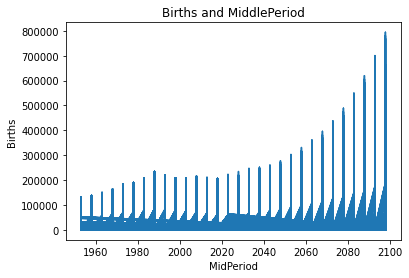

In [84]:
# this makes a cahrt of the births per country with lables, axis, and a legend .
x = df['MidPeriod']
y = df['Births']
plt.plot(x,y)
plt.xlabel("MidPeriod")
plt.ylabel("Births")
plt.title('Births and MiddlePeriod')



Discussion:
           The data that I was analyzing was ferttility in different countries.
           My analysis tells me the corrilation between births and different countries. 
           My analysis also tell me the relatioship between the time period and the birth for a specific 
           country in the period. My analysis also gives a short description of the csv file 